# 浅层神经网络

## 1. 神经网络总览

在上一节我们介绍了逻辑回归的计算过程，将多个逻辑回归的sigmoid单元融合起来，就成为了一个非常简单的神经网络。

下图中，每个圆圈所代表的神经元，包含了线性组合（$w^Tx+b$）以及激活函数激活（$\sigma(z)$）两个计算步骤。

为了方便计算，在神经网络中，每一层的权重会形成一个矩阵 $W$（而不再是向量 $w$），一个截距向量 $b$（而不再是截距标量 $b$）。用方括号上标 $[i]$ 表示第 $i$ 层对应的参数。习惯上，输入层不计入神经网络的层数（也可以把输入层看做是第 $0$ 层）。下图表示了一个两层的神经网络及其对应的参数。

整个计算过程，也是往复的前向传播和后向传播过程。

![What is a neural network](img/What is a Neural Network.png)

## 2. 神经网络的表示

输入层、隐藏层、输出层。在监督学习的环境中，输入层和输出层的数据是已有的，而隐藏层是无法观测到的变量。每一层的值可以用 $a^{[l]}$ 来表示，$a$ 代表激活activation，是本层的输出，同时也是给定到下一层的输入。模型的输入 $X$ 可以看做是 $a^{[0]}$。

![Neural Network Representation](img/Neural Network Representation.png)

## 3. 神经网络的计算过程



上面说到，逻辑回归的过程，其实就是一个神经元，包含线性组合和激活函数激活两个步骤。而神经网络的计算过程，可以看做是重复计算多次逻辑回归。

![Computing a Neural Network's Output 1](img/Computing a Neural Network's Output 1.png)
![Computing a Neural Network's Output 2](img/Computing a Neural Network's Output 2.png)

重复计算的过程，如果使用for循环来写，会十分低效。事实上，将每一层每个神经元的权重向量组合为权重矩阵，将截距标量组合为截距向量，可以大幅简化计算。
![Computing a Neural Network's Output 3](img/Computing a Neural Network's Output 3.png)

在这个两层的神经网络中，完成对隐藏层的计算后，最终计算输出层，就又回到了一个四个特征的逻辑回归模型。
![Computing a Neural Network's Output 4](img/Computing a Neural Network's Output 4.png)

## 4. 针对多个训练样本的向量化

在上面的图中，$x_1$, $x_2$ 等都是标量，也即单个实数。当有 $m$ 个训练样本时，上面的计算可能需要重复计算 $m$ 次。但通过将 $x_1$ 转为一个 $m$ 维的向量，将 $[x_1, x_2, x_3]$ 向量转为一个 $n \times m$ 的矩阵，其他保持不变，可以避免for循环。

![Vectorizing across multiple examples](img/Vectorizing across multiple examples.png)

## 5. 向量化实现的解释

![Explanation for vectorized implementation](img/Explanation for vectorized implementation.png)

## 6. 激活函数

神经元的计算过程中，激活函数的选择可以是不仅限于sigmoid函数的其它非线性函数。

**tanh函数（双曲函数）在实践中几乎总是比sigmoid函数更好**，尤其在当数据做了标准化均值为 $0$ 的情况。$tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$，tanh函数其实是sigmoid函数拉伸并偏移之后的版本，其值域是 $(-1, 1)$。

实际情况中，**神经网络几乎从不使用sigmoid函数作为激活函数**。唯一的例外是输出层，当需要输出 $(0, 1)$ 区间内的值，最终输出层的激活函数会是sigmoid函数。

tanh函数和sigmoid函数的一个共同缺陷，是当 $z$ 的绝对值非常大的情况下，两个函数的梯度绝对值都会非常小，导致梯度下降的学习缓慢。为应对这个问题，在神经网络中非常流行的做法是使用ReLU函数（线性整流函数）。$ReLU(z) = \max(0, z)$。ReLU函数大于0时梯度固定，小于0时梯度为0。其在0点的导数理论上不存在，但由于计算机的浮点数可以认为永远不等于0，所以在实际中并不影响。**ReLU函数几乎已经成为了目前神经网络的默认激活函数。**

ReLU函数的缺陷是，当 $z<0$ 时梯度为0，在实际中这点没有太大影响。但为了解决这个问题，也有人提出了Leaky ReLU（带泄露整流函数）。Leaky ReLU在 $z<0$ 时，会分配一个非常小的梯度。**Leaky ReLU的理论效果会强于ReLU，但实际中还是ReLU的使用更为广泛**。

ReLU和Leaky ReLU的共同有点是，对于绝大多数的点，梯度都相对比0大得多，这样算法的学习速度会比tanh函数和sigmoid函数快。

![Activation functions](img/Activation functions.png)

## 7. 为什么神经网络需要非线性的激活函数

如果去除神经元中的激活函数（或使用线性的激活函数），那么无论神经网络有多少层，最终的输出层都只会是输入层的线性组合。如果隐藏层使用线性激活函数，而最终的输出层使用sigmoid激活函数，那么这个模型就等同于逻辑回归。

唯一可能会使用线性激活函数的情境，是当使用神经网络进行回归模型训练时，在最终的输出层上可能会使用线性激活函数（隐藏层依然是非线性的激活函数）。

## 8. 激活函数的导数

在对神经网络的成本函数计算梯度的过程中，会需要对激活函数计算导数。

![Sigmoid activation function](img/Sigmoid activation function.png)
![Tanh activation function](img/Tanh activation function.png)
![ReLU and Leaky ReLU](img/ReLU and Leaky ReLU.png)

## 9. 神经网络的梯度下降过程

神经网络的梯度下降，和传统机器学习算法的过程非常类似。定义初始化参数 -> 根据模型进行计算预测结果 -> 根据预测结果和实际标签计算成本函数 -> 成本函数计算梯度 -> 使用梯度下降更新参数。重复整个流程直到梯度下降收敛。

![Gradient descent for neural networks](img/Gradient descent for neural networks.png)

初始化参数的方法后面会讲，在神经网络中需要随机初始化，按照0值来初始化会有问题；根据模型进行计算预测结果，就是前向传播的过程；成本函数则依据是回归（e.g. MSE）还是分类（e.g. Logloss）问题而定；梯度下降的过程，和传统机器学习算法完全一致；那么唯一的问题就是，如果计算神经网络的梯度，神经网络梯度的计算过程，就是反向传播。

下面这张图直接给出了两层神经网络的梯度计算公式。

![Formulas for computing derivatives](img/Formulas for computing derivatives.png)

## 10. 反向传播

反向传播实际上还是求解偏导，神经网络求解偏导的过程之所以复杂，主要还是在于其求偏导的过程，需要应用矩阵微积分。

TODO

## 11. 随机初始化

上面提到，在训练神经网络时，参数的随机初始化极其重要。逻辑回归的参数可以初始化为0，但如果神经网络的所有参数都初始化为0，梯度下降算法将无法正常运算。

实际上截距项初始化为0是没问题的，会影响梯度下降过程的主要是将权重项初始化为0。当权重全部为0时，同一层的神经元，前向传播过程中其激活值会完全相同。而进行反向传播时，梯度也会相同。梯度下降一次迭代更新后，权重矩阵的每一行都会是相同的。继续循环下去，每一层各个神经元的激活值还是相同，神经网络成为多个相同神经元的叠加，就失去了意义。

![What happens if you initialize weights to zero?](img/What happens if you initialize weights to zero.png)

解决方案是对权重进行随机初始化（截距项依然可以按照0值进行初始化）。在实际操作中，通常将权重初始化为非常接近0的随机数，这样当使用tanh函数或sigmoid函数作为激活函数时，其梯度会相对比较大，梯度下降收敛的速度会快一些。

![Random initialization](img/Random initialization.png)

## 12. Show Me The code

在这里，我们将构建一个包含一层隐藏层的神经网络。我们会注意到，这个浅层神经网络模型和之前的逻辑回归有着巨大的差别。

**通过这个编程练习，可以学到：**
- 实现一个包含单一隐藏层的二分类神经网络
- 使用非线性函数（例如tanh）作为激活函数的神经元
- 计算交叉熵损失
- 实现前向传播和后向传播

### 12.1 三方包

首先，运行下面的代码块，来引入在这个编程练习中所需要的包。 
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [sklearn](http://scikit-learn.org/stable/) 是Python生态区中一个简单而高效地处理数据挖掘和数据分析的工具包
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- testCases 提供了一些测试用例，用来测试所写函数的准确性
- planar_utils 提供了一些在练习中会用到的实用函数

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### 12.2 数据集

首先，我们看一下数据集。下面的代码块会载入一批鲜花的二分类数据集到变量 `X` 和 `Y` 中。

In [2]:
X, Y = load_planar_dataset()

使用matplotlib对数据集进行可视化。数据看起来像是鲜花，有一些红色的点（标签 y=0）和一些蓝色的点（y=1）。我们的目标是构造一个模型，来拟合这些数据。

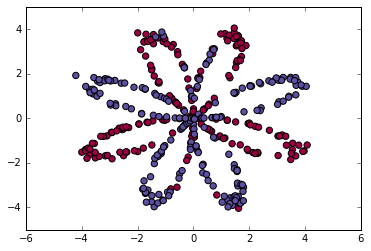

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

现在有:
    - 一个numpy数组类型的矩阵 X 包含着特征 (x1, x2)
    - 一个numpy数组类型的向量 Y 包含着标签 (红色:0, 蓝色:1).

首先我们来看一下数据长什么样。

**练习**：查看我们有多少个训练样本。另外，`X` 和 `Y` 的 `shape` 是什么样的？ 

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**预期输出**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>